# Hodkin-Huxley方程式

Hodkin-Huxley方程式では, 膜電位$V$のダイナミクスを全膜電流$I_m(t)$, 時間$t$, mゲートの開確率$m$, hゲートの開確率$h$, nゲートの開確率$n$, の6つの変数を次に示す4つの微分方程式および6つの関係式で表す.  
$$  \begin{eqnarray}
\bar{C}_m\frac{dV}{dt} &=& I_m(t)
        - \bar{g}_{\mathrm Na}m(V, t)^3h(V, t)(V-\bar{E}_{\mathrm Na})
        - \bar{g}_{\mathrm K}n(V, t)^4(V-\bar{E}_{\mathrm K})
        - \bar{g}_{\mathrm l}(V-\bar{E}_{\mathrm l})
\\
\frac{\mathrm{d}}{\mathrm{d}t}m(V, t) &=& \alpha_m(V)(1-m(V, t)) - \beta_m(V)m(V, t)
\\
\frac{\mathrm{d}}{\mathrm{d}t}h(V, t) &=& \alpha_h(V)(1-h(V, t)) - \beta_h(V)h(V, t)
\\
\frac{\mathrm{d}}{\mathrm{d}t}n(V, t) &=& \alpha_n(V)(1-n(V, t)) - \beta_n(V)n(V, t)
\\
\alpha_m(V) &=& \frac{0.1(25-V)}{\exp{\left(\frac{25-V}{10}\right)}-1}\hspace{16pt}
\beta_m(V) = 4\exp{\left(-\frac{V}{18}\right)}
\\
\alpha_h(V)&=& 0.07\exp{\left(-\frac{V}{20}\right)}\hspace{16pt}
\beta_h(V) = \frac{1}{\exp{\left(\frac{30-V}{10}\right)}-1}
\\
\alpha_n(V) &=& \frac{0.01(10-V)}{\exp{\left(\frac{10-V}{10}\right)}-1}\hspace{16pt}
\beta_n(V) = 0.125\exp{\left(-\frac{V}{80}\right)}
\\
\end{eqnarray}
$$
  
ただし, 定数として次の値を用いる.   
$$\begin{eqnarray}
\bar{C}_m &=& 1.0\ ~
\bar{g}_{\mathrm Na} &=& 120\ ~
\bar{E}_{\mathrm Na} &=& 50.0\ ~
\bar{g}_{\mathrm K} &=& 36\ ~
\bar{E}_{\mathrm K} &=& -77\ ~
\bar{g}_{\mathrm l} &=& 0.3\ ~
\bar{E}_{\mathrm l} &=& -54.387
\end{eqnarray}$$

Hodkin-Huxley方程式では, 膜電位$V$のダイナミクスを全膜電流$I_m(t)$, 時間$t$, mゲートの開確率$m$, hゲートの開確率$h$, nゲートの開確率$n$, の6つの変数を次に示す4つの微分方程式および6つの関係式で表す.  
$$
\bar{C}_m\frac{dV}{dt} = I_m(t)
        - \bar{g}_{\mathrm Na}m(V, t)^3h(V, t)(V-\bar{E}_{\mathrm Na})
        - \bar{g}_{\mathrm K}n(V, t)^4(V-\bar{E}_{\mathrm K})
        - \bar{g}_{\mathrm l}(V-\bar{E}_{\mathrm l})
\\
\frac{\mathrm{d}}{\mathrm{d}t}m(V, t) = \alpha_m(V)(1-m(V, t)) - \beta_m(V)m(V, t)
\\
\frac{\mathrm{d}}{\mathrm{d}t}h(V, t) = \alpha_h(V)(1-h(V, t)) - \beta_h(V)h(V, t)
\\
\frac{\mathrm{d}}{\mathrm{d}t}n(V, t) = \alpha_n(V)(1-n(V, t)) - \beta_n(V)n(V, t)
\\
\alpha_m(V) = \frac{0.1(25-V)}{\exp{\left(\frac{25-V}{10}\right)}-1}\hspace{16pt}
\beta_m(V) = 4\exp{\left(-\frac{V}{18}\right)}
\\
\alpha_h(V) = 0.07\exp{\left(-\frac{V}{20}\right)}\hspace{16pt}
\beta_h(V) = \frac{1}{\exp{\left(\frac{30-V}{10}\right)}-1}
\\
\alpha_n(V) = \frac{0.01(10-V)}{\exp{\left(\frac{10-V}{10}\right)}-1}\hspace{16pt}
\beta_n(V) = 0.125\exp{\left(-\frac{V}{80}\right)}
$$
  
ただし, 定数として次の値を用いる.   
$$
\bar{C}_m = 1.0\
\bar{g}_{\mathrm Na} = 120\
\bar{E}_{\mathrm Na} = 50.0\
\bar{g}_{\mathrm K} = 36\
\bar{E}_{\mathrm K} = -77
\bar{g}_{\mathrm l} = 0.3\
\bar{E}_{\mathrm l} = -54.387
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 定数の設定
CM = 1.0

dt = 0.01
t_end = 100
t = np.arange(0.0, t_end, dt, dtype=np.float64)
NUM = t.size
V = np.zeros_like(t)

In [3]:
# Naチャネル
class chN():
    def __init__(self, V0, NUM):
        self.G = 120.0
        self.E = 115.0
        self.m = np.zeros(NUM, dtype=np.float64)
        self.h = np.ones(NUM, dtype=np.float64)
        self.m[0] = self.am(V0)/(self.am(V0)+self.bm(V0))
        self.h[0] = self.ah(V0)/(self.ah(V0)+self.bh(V0))
        
    def am(self, V):
        return 0.1*(25.-V) / (np.exp((25-V)/10.)-1.)
    def bm(self, V):
        return 4.*np.exp(-V/18.)

    def ah(self, V):
        return 0.07*np.exp(-V/20.)
    def bh(self, V):
        return 1. / (np.exp((30.-V)/10.)+1.)
    
    def dm(self, V, t, i):
        return self.am(V)*(1.-self.m[i]) - self.bm(V)*self.m[i]
    
    def dh(self, V, t, i):
        return self.ah(V)*(1.-self.h[i]) - self.bh(V)*self.h[i]
    
    def re(self, V, t, i):
        self.m[i+1] = self.m[i] + self.dm(V, t, i)*dt
        self.h[i+1] = self.h[i] + self.dh(V, t, i)*dt
        
    def I(self, V, t, i):
        return self.G*(self.m[i]**3)*(self.h[i])*(V-self.E)

In [4]:
# Kイオンチャネル
class chK():
    def __init__(self, V0, NUM):
        self.G = 36.0
        self.E = -12.0
        self.n = np.ones(NUM, dtype=np.float64)
        self.n[0] = self.an(V0)/(self.an(V0)+self.bn(V0))
    
    def an(self, V):
        return 0.01*(10.-V) / (np.exp((10.-V)/10.)-1.)
    def bn(self, V):
        return 0.125*np.exp(-V/80.)
    
    def dn(self, V, t, i):
        return self.an(V)*(1.-self.n[i]) - self.bn(V)*self.n[i]
    
    def re(self, V, t, i):
        self.n[i+1] = self.n[i] + self.dn(V, t, i)*dt
    
    def I(self, V, t, i):
        return self.G*(self.n[i]**4)*(V-self.E)

In [5]:
# リークチャネル
class chL():
    def __init__(self):
        self.G = 0.3
        self.E = 10.613
    
    def I(self, V, t, i):
        return self.G*(V-self.E)

In [6]:
# 刺激の設定
st_1s = 10
st_1e = 30
st_2s = 60
st_2e = 80
stm = 6.0
Is = np.zeros_like(t)
for i in range(NUM):
    if st_1s < t[i] < st_1e:
        Is[i] = stm
    elif st_2s < t[i] < st_2e:
        Is[i] = stm*0.33

In [7]:
# 初期化および実行
Im = np.zeros_like(t)
Ic = np.zeros_like(t)
N = chN(V[0], NUM)
K = chK(V[0], NUM)
L = chL()
for i in range(NUM-1):
    N.re(V[i], t[i], i)
    K.re(V[i], t[i], i)
    Ic[i] = N.I(V[i], t[i], i) + K.I(V[i], t[i], i) + L.I(V[i], t[i], i)
    Im[i] = Is[i] - Ic[i]
    V[i+1] = V[i] + Im[i]*dt/CM

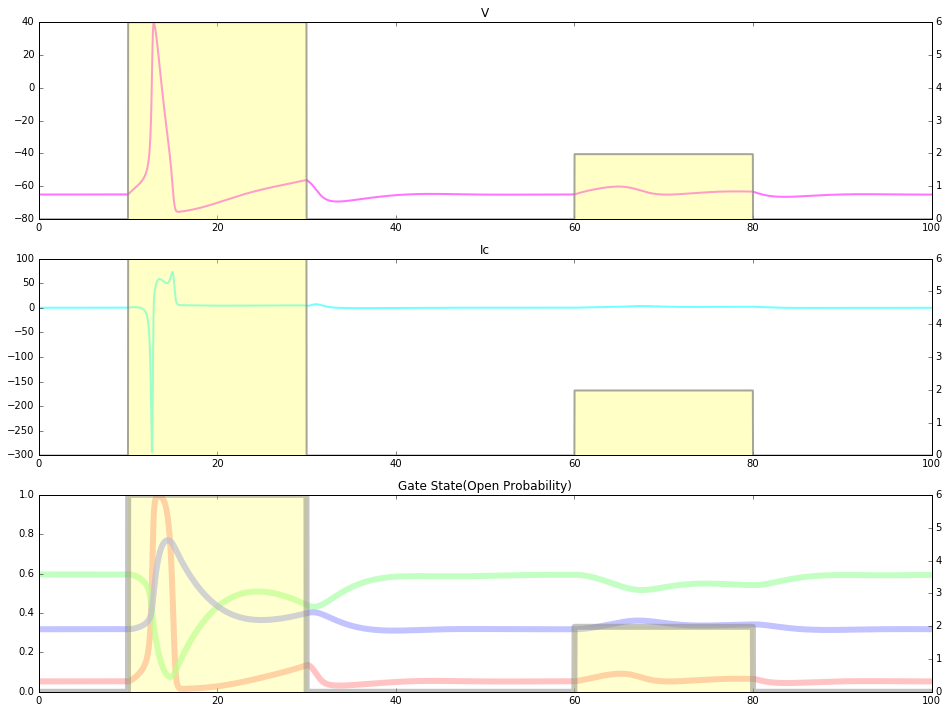

In [10]:
plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.title("V")
plt.plot(t, V-65, "#FF44FF", linewidth=2, alpha=0.75)
right = plt.twinx()
right.plot(t, Is, "#888888", linewidth=2, alpha=0.75)
plt.fill_between(t, Is, where=Is>0, color="#FFFF44", alpha=0.3)

plt.subplot(312)
plt.title("Ic")
plt.plot(t, Ic, "#44FFFF", linewidth=2, alpha=0.75)
right = plt.twinx()
right.plot(t, Is, "#888888", linewidth=2, alpha=0.75)
plt.fill_between(t, Is, where=Is>0, color="#FFFF44", alpha=0.3)

plt.subplot(313)
plt.title("Gate State(Open Probability)")
plt.plot(t, N.m, "#FFAAAA", linewidth=6, alpha=0.7)
plt.plot(t, N.h, "#AAFFAA", linewidth=6, alpha=0.7)
plt.plot(t, K.n, "#AAAAFF", linewidth=6, alpha=0.7)
right = plt.twinx()
right.plot(t, Is, "#888888", linewidth=6, alpha=0.5)
plt.fill_between(t, Is, where=Is>0, color="#FFFF44", alpha=0.25)

plt.show()